# Predicting Tags for Stack Overflow

## Table of Contents
* [Instructions](#Instructions)

#### Part 1: Data Processing
* [Import Modules](#Import-Modules)
* [Import Data](#Import-Data)
* [Data Cleaning](#Data-Cleaning)
* [Analysis of Tags](#Analysis-of-Tags)

#### Part 2: Machine Learning Models
* [Bag of Words](#Bag-of-Words)
* [OneVsRestClassifier with SGDClassifier](#OneVsRestClassifier-with-SGDClassifier)
* [OneVsRestClassifier with DecisionTreeClassifier](#OneVsRestClassifier-with-DecisionTreeClassifier)
* [OneVsRestClassifier with RidgeClassifier](#OneVsRestClassifier-with-RidgeClassifier)
* [OneVsRestClassifier with KNeighborsClassifier](#OneVsRestClassifier-with-KNeighborsClassifier)
* [OneVsRestClassifier with ExtraTreesClassifier](#OneVsRestClassifier-with-ExtraTreesClassifier)
* [Adapted Algorithm: Multilabel k Nearest Neighbours](#Adapted-Algorithm:-Multilabel-k-Nearest-Neighbours)
* [Evaluation Metrics for Different Models](#Evaluation-Metrics-for-Different-Models) 
* [Tuning CountVectorizer to Fit DecisionTreeClassifier](#Tuning-CountVectorizer-to-Fit-DecisionTreeClassifier)
  * [Max_features: 50](#Max_features:-50)
  * [Max_features: 100](#Max_features:-100)
  * [Max_features: 200](#Max_features:-200)
  * [Max_features: 300](#Max_features:-300)
  * [Max_features: 400](#Max_features:-400)
  * [Max_features: 500](#Max_features:-500)
  * [Max_features: 1000](#Max_features:-1000)
  * [Evaluation Metrics for DecisionTreeClassifier](#Evaluation-Metrics-for-DecisionTreeClassifier)
  
#### Part 3: Making Predictions
* [Tags Prediction](#Tags-Prediction)

## Instructions
[Top](#Table-of-Contents)

1. You will need to create Artificial Intelligence (AI) or Machine Learning (ML) models to predict tags or keywords based on the questions and titles.
2. You will have 2 weeks to complete and send your code. 
3. You can use any programming language you like including R or Python. 
4. The accuracy of your model will be evaluated based on the F1 Score. The F1 Score, which is between 0% to 100%, provides a comprehensive measure of accuracy using both Precision and Recall.
5. It's ok to just use the first or any random **5,000 rows** of the dataset since the size of the data is quite large.
6. If you figure out how to manage the large dataset given your Memory or RAM limitation, that's even better.

## Part 1: Data Processing
### Import Modules
[Top](#Part-1:-Data-Processing)

In [168]:
# data processing
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# cleaning data
import re
import bs4
import nltk
import nltk.tokenize as tok
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import stopwords

# machine learning models
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier
from skmultilearn.adapt import MLkNN
from sklearn.metrics import classification_report, f1_score, precision_score, recall_score, accuracy_score

In [169]:
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\long\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\long\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

## Import Data
[Top](#Part-1:-Data-Processing)

Selecting first 10,000 rows from the original dataset of 6,034,195 rows. 

In [170]:
filename = 'Train.csv'
no_of_rows = 10000
df = pd.read_csv(filename, nrows = no_of_rows)
print(df.shape)
df.head()    

(10000, 4)


,Id,Title,Body,Tags
0,1,How to check if an uploaded file is an image w...,<p>I'd like to check if an uploaded file is an...,php image-processing file-upload upload mime-t...
1,2,How can I prevent firefox from closing when I ...,"<p>In my favorite editor (vim), I regularly us...",firefox
2,3,R Error Invalid type (list) for variable,<p>I am import matlab file and construct a dat...,r matlab machine-learning
3,4,How do I replace special characters in a URL?,"<p>This is probably very simple, but I simply ...",c# url encoding
4,5,How to modify whois contact details?,<pre><code>function modify(.......)\n{\n $mco...,php api file-get-contents


## Data Cleaning
[Top](#Part-1:-Data-Processing)

Remove unnecessary characters, html format and punctuation (but keeping words like c# since it's the most popular tag) as well as lowering text, transforming abbreviations, lemmatizing words and removing stop words from `Title` and `Body` column.

Lemmatization is the process of grouping together the different inflected forms of a word so they can be analyzed as a single item. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word.

The process of converting data to something a computer can understand is referred to as pre-processing. One of the major forms of pre-processing is to filter out useless data. In natural language processing, useless words (data) are referred to as stop words.

In [171]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    
    return text

In [172]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    
    return [item for item in newlist if item != '']

In [173]:
def clean_punct(text): 
    words = token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In grammar, inflection is the modification of a word to express different grammatical categories such as tense, case, voice, aspect, person, number, gender, and mood. An inflection expresses one or more grammatical categories with a prefix, suffix or infix, or another internal modification such as a vowel change.

**Lemmatization** is the process of grouping together the different inflected forms of a word so they can be analysed as a single item. Lemmatization reduces the inflected words properly ensuring that the root word belongs to the language. In Lemmatization root word is called Lemma. A lemma (plural lemmas or lemmata) is the canonical form, dictionary form, or citation form of a set of words. Lemmatization is similar to stemming but it brings context to the words. So it links words with similar meaning to one word. 

In [174]:
def lemitizeWords(text):
    words = token.tokenize(text)
    listLemma = []
    
    for w in words:
        x = lemma.lemmatize(w, pos = "v")
        listLemma.append(x)
        
    return ' '.join(map(str, listLemma))

**Stop Words** are words which do not contain important significance to be used in Search Queries. Usually, these words are filtered out from search queries because they return a vast amount of unnecessary information. Each programming language will give its own list of stop words to use. Mostly they are words that are commonly used in the English language such as 'as, the, be, are' etc.

In [175]:
def stopWordsRemove(text):
    stop_words = set(stopwords.words("english"))    
    words = token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    
    return ' '.join(map(str, filtered))

Cleaning data in the `Body` column.

In [176]:
%%time
# Wall time: 48.9 s

flat_list = [item for sublist in df['Tags'].values for item in sublist]
keywords = nltk.FreqDist(flat_list)
keywords = nltk.FreqDist(keywords)
frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]

# ToktokTokenizer is a fast, simple, multilingual tokenizer. 
token = tok.ToktokTokenizer()
lemma = WordNetLemmatizer()
punct = '!"$%&\'()*,./:;<=>?@[\\]^_`{|}~'

# Converting html to text in the body
df['Body'] = df['Body'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text()) 
df['Body'] = df['Body'].apply(lambda x: clean_text(x)) 
df['Body'] = df['Body'].apply(lambda x: clean_punct(x)) 
df['Body'] = df['Body'].apply(lambda x: lemitizeWords(x)) 
df['Body'] = df['Body'].apply(lambda x: stopWordsRemove(x)) 

Wall time: 41.9 s


Cleaning data in the `Title` column.

In [177]:
%%time
# Wall time: 10.2 s

df['Title'] = df['Title'].apply(lambda x: str(x))
df['Title'] = df['Title'].apply(lambda x: clean_text(x)) 
df['Title'] = df['Title'].apply(lambda x: clean_punct(x)) 
df['Title'] = df['Title'].apply(lambda x: lemitizeWords(x)) 
df['Title'] = df['Title'].apply(lambda x: stopWordsRemove(x)) 

Wall time: 9.69 s


In [178]:
print(df.shape)
df.head()

(10000, 4)


,Id,Title,Body,Tags
0,1,check upload file image without mime type,would like check upload file image file eg png...,php image-processing file-upload upload mime-t...
1,2,prevent firefox close press ctrl-w,favorite editor vim regularly use ctrl-w execu...,firefox
2,3,r error invalid type list variable,import matlab file construct data frame matlab...,r matlab machine-learning
3,4,replace special character url,probably simple simply cannot find answer basi...,c# url encoding
4,5,modify whois contact detail,function modify mcontact filegetcontents https...,php api file-get-contents


## Analysis of Tags
[Top](#Part-1:-Data-Processing)

Text preprocessing, tokenizing and filtering of stopwords are all included in `CountVectorizer` which builds a dictionary of features and transforms documents to feature vectors.

In [179]:
# using split() to tokenize each tag using space.
vectorizer = CountVectorizer(tokenizer = lambda x: x.split())

# fit_transform() does two functions: 
# 1. it fits the model and learns the vocabulary; 
# 2. it transforms training data into feature vectors. The input to fit_transform should be a list of strings.
tags = vectorizer.fit_transform(df['Tags'])

print("Number of data points :", tags.shape[0])
print("Number of unique tags :", tags.shape[1])

Number of data points : 10000
Number of unique tags : 6124


In [180]:
# get_feature_name() gives the vocabulary.
tags_feat = vectorizer.get_feature_names()

print("Some of the tags found in the dataset:")
print(tags_feat[:10])

Some of the tags found in the dataset:
['.htaccess', '.net', '.net-2.0', '.net-3.5', '.net-4.0', '.net-4.5', '.net-assembly', '.net-framework', '.net4.0', '.refresh']


In [181]:
# Storing the count of tag in each question to list 'tag_count'
tag_count = tags.sum(axis = 1).tolist()

# Converting each value in the 'tag_count' to integer.
tag_count = [int(j) for i in tag_count for j in i]

print('Total datapoints:', len(tag_count))
print('Number of tags for the first 10 questions:', tag_count[:10]) 

Total datapoints: 10000
Number of tags for the first 10 questions: [5, 1, 3, 3, 3, 3, 1, 3, 3, 5]


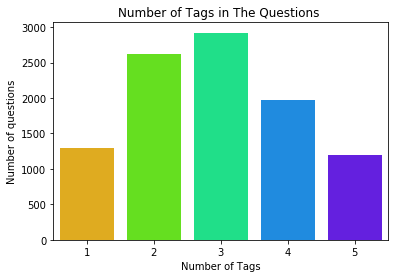

In [182]:
sns.countplot(tag_count, palette = 'gist_rainbow')
plt.title("Number of Tags in The Questions ")
plt.xlabel("Number of Tags")
plt.ylabel("Number of questions")
plt.show()

In [183]:
# count frequency of each tag
freqs = tags.sum(axis = 0).A1 
tags_freq = pd.DataFrame(tags_feat, columns = ['Tags'])
tags_freq['Frequency'] = freqs
tags_freq.head()

,Tags,Frequency
0,.htaccess,40
1,.net,302
2,.net-2.0,6
3,.net-3.5,7
4,.net-4.0,10


In [184]:
# sort each tag in descending order according ot the number of occurence
sorted_tags = tags_freq.sort_values(['Frequency'], ascending = False) 
sorted_tags.head()

,Tags,Frequency
674,c#,778
2666,java,703
3937,php,701
2685,javascript,624
179,android,518


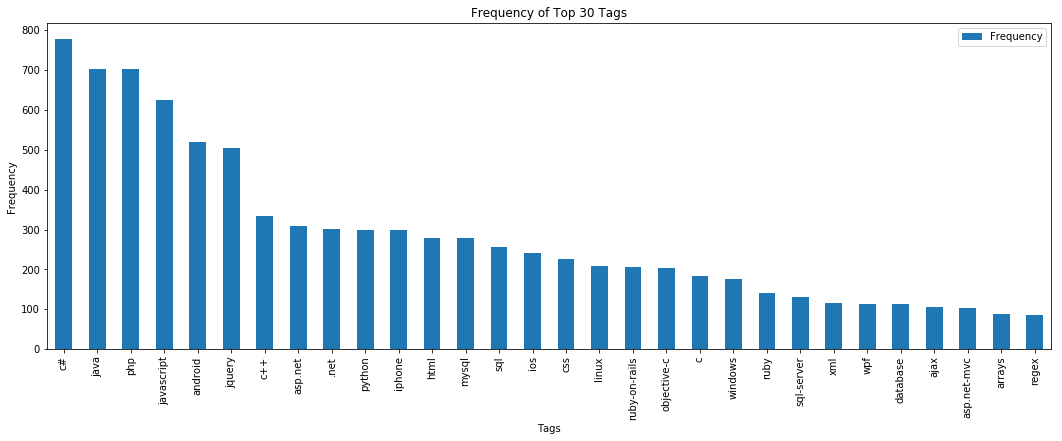

In [185]:
i = np.arange(30)
sorted_tags.head(30).plot(figsize = (18, 6), kind = 'bar')
plt.title('Frequency of Top 30 Tags')
plt.xticks(i, sorted_tags['Tags'])
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.show()

## Part 2: Machine Learning Models
### Bag of Words
[Top](#Part-2:-Machine-Learning-Models)

**Bag of Words** is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. 

The input data is in the form of words and characters. So it needs to be converted into numeric format that the model can understand. An array of the top words will be created and a comment will be represented by a dense vector with 0 or 1 indicating the absence or presence of a given keyword or tag from the vocabulary in a comment.

In [186]:
df['Post'] = df['Title'].map(str) + " " + df['Body']
print(df.shape)
df.head()

(10000, 5)


,Id,Title,Body,Tags,Post
0,1,check upload file image without mime type,would like check upload file image file eg png...,php image-processing file-upload upload mime-t...,check upload file image without mime type woul...
1,2,prevent firefox close press ctrl-w,favorite editor vim regularly use ctrl-w execu...,firefox,prevent firefox close press ctrl-w favorite ed...
2,3,r error invalid type list variable,import matlab file construct data frame matlab...,r matlab machine-learning,r error invalid type list variable import matl...
3,4,replace special character url,probably simple simply cannot find answer basi...,c# url encoding,replace special character url probably simple ...
4,5,modify whois contact detail,function modify mcontact filegetcontents https...,php api file-get-contents,modify whois contact detail function modify mc...


**TF-IDF** is an acronym than stands for 'Term Frequency – Inverse Document Frequency' which are the components of the resulting scores assigned to each word.

* Term Frequency summarizes how often a given word appears within a document.
* Inverse Document Frequency downscales words that appear a lot across documents.

TF-IDF are word frequency scores that try to highlight words that are more interesting or frequent found in document but not across documents. `TfidfVectorizer` tokenizes documents, learns the vocabulary and inverses document frequency weightings and to encode new documents. It convert texts to a matrix of TF-IDF features.

`CountVectorizer` on the other hand converts a collection of text documents to a matrix of token counts.

Setting train and test split ratio to 80/20 for train and test dataset.

In [187]:
tfidf_vectorizer = TfidfVectorizer(min_df = 0.00009, max_features = 200000, smooth_idf = True, norm = "l2", 
                                   tokenizer = lambda x: x.split(), sublinear_tf = False, ngram_range = (1, 2))
count_vectorizer = CountVectorizer(tokenizer = lambda x: x.split(), binary = 'true', max_features = 500)

vectorize_post = tfidf_vectorizer.fit_transform(df['Post'])
vectorize_tags = count_vectorizer.fit_transform(df['Tags'])

x_train, x_test, y_train, y_test = train_test_split(vectorize_post, vectorize_tags, random_state = 42, test_size = 0.2, 
                                                    shuffle = False)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(8000, 200000) (2000, 200000) (8000, 500) (2000, 500)


Some of the keywords found in vectorized `Post` column:

In [188]:
print(tfidf_vectorizer.get_feature_names()[20000:20050])

['apply two', 'apply update', 'apply value', 'apply would', 'apply-templates', 'apply-templates select', 'apply-templates table', 'apply-templates xsl', 'applycommand', 'applycommand get', 'applycommand new', 'applycommand null', 'applycommand public', 'applyconfiguration', 'applyfilters', 'applyrelops', 'applyrelops df', 'applyrequestvalues', 'applyrequestvalues 2', 'appmainloop', 'appmanager-findbyappleid', 'appmanager-findbyappleid 547409501', 'appmobi', 'appmodel', 'appmonster', 'appname', 'appointment', 'appointmentid', 'appointments', 'appointmentstatusid', 'appostrophes', 'apppath', 'appphp', 'apprakefile', 'apprakefile 7', 'appreaciated', 'appreciate', 'appreciate -', 'appreciate --', 'appreciate .', 'appreciate answer', 'appreciate anyone', 'appreciate assistance', 'appreciate cheer', 'appreciate code', 'appreciate could', 'appreciate define', 'appreciate edit', 'appreciate feedback', 'appreciate follow']


Some of the tags found in vectorized `Tags` column:

In [189]:
print(count_vectorizer.get_feature_names()[200:250])

['http', 'https', 'ide', 'if-statement', 'iis', 'iis7', 'image', 'image-processing', 'import', 'index', 'inheritance', 'input', 'insert', 'installation', 'interface', 'interface-builder', 'internet-explorer', 'ios', 'ios4', 'ios5', 'ios6', 'ipad', 'iphone', 'iphone-sdk-4.0', 'iptables', 'jar', 'java', 'java-ee', 'javascript', 'javascript-events', 'join', 'joomla', 'jpa', 'jqgrid', 'jquery', 'jquery-ajax', 'jquery-mobile', 'jquery-plugins', 'jquery-selectors', 'jquery-ui', 'jsf', 'jsf-2', 'json', 'jsp', 'jvm', 'keyboard', 'lambda', 'layout', 'licensing', 'limit']


## OneVsRestClassifier with SGDClassifier
[Top](#Part-2:-Machine-Learning-Models)

`One-vs-the-rest` strategy consists in fitting one classifier per class. For each classifier, the class is fitted against all the other classes.  In addition to its computational efficiency (only n_classes classifiers are needed), one advantage of this approach is its interpretability. Since each class is represented by one and one classifier only, it is possible to gain knowledge about the class by inspecting its corresponding classifier. This is the most commonly used strategy for multiclass classification and is a fair default choice.

`SGDClassifier` is a Linear classifiers (SVM, logistic regression) with SGD training. This estimator implements regularized linear models with stochastic gradient descent (SGD) learning: the gradient of the loss is estimated each sample at a time and the model is updated along the way with a decreasing strength schedule (aka learning rate). The model it fits can be controlled with the loss parameter. By default, it fits a linear support vector machine (SVM).

In [190]:
def train_model(model, x_train, x_test, y_train, y_test):
    model_name = model
    model_name.fit(x_train, y_train)
    y_pred = model_name.predict(x_test)

    f1 = f1_score(y_test, y_pred, average = 'micro')
    precision = precision_score(y_test, y_pred, average = 'micro')
    recall = recall_score(y_test, y_pred, average = 'micro')
    accuracy = accuracy_score(y_test, y_pred)

    # Evaluation Metrics 
    print("Micro F1 Score: %.3f" % (f1))
    print("Micro Precision: %.3f" % (precision))
    print("Micro Recall: %.3f" % (recall))
    print("Accuracy: %.3f" % (accuracy))
    
    return f1, precision, recall, accuracy, y_pred

In [191]:
%%time
# Wall time: 1min 2s

sgd = SGDClassifier(loss = 'log', alpha = 0.00001, penalty = 'l1') 
sgd_f1, sgd_precision, sgd_recall, sgd_accuracy, y_pred_sgd = train_model(OneVsRestClassifier(sgd, n_jobs = -1), 
                                                                          x_train, x_test, y_train, y_test)

Micro F1 Score: 0.345
Micro Precision: 0.745
Micro Recall: 0.225
Accuracy: 0.187
Wall time: 46 s


## OneVsRestClassifier with DecisionTreeClassifier
[Top](#Part-2:-Machine-Learning-Models)

`DecisionTreeClassifier` is a class capable of performing multi-class classification on a dataset. As with other classifiers, it takes inputs as two arrays: an array X holding the training samples and an array Y of integer values holding the class labels for the training samples.

In [201]:
%%time
# Wall time: 17min 22s

dtc = DecisionTreeClassifier() 
dt_f1, dt_precision, dt_recall, dt_accuracy, y_pred_dt = train_model(OneVsRestClassifier(dtc, n_jobs = -1), 
                                                                     x_train, x_test, y_train, y_test)

Micro F1 Score: 0.408
Micro Precision: 0.441
Micro Recall: 0.379
Accuracy: 0.139
Wall time: 17min 22s


## OneVsRestClassifier with RidgeClassifier
[Top](#Part-2:-Machine-Learning-Models)

It is a classifier using Ridge regression. Ridge regression avoids over-fitting by regularising the weights to keep them small and model selection is straight forward because only have to choose the value of a single regression parameter. Sometimes model selection becomes difficult as there is a degree of freedom for each feature which makes it possible to over-fit the feature selection criterion and might end up with a set of features that is optimal for this particular sample of data but gives poor generalisation performance. So not performing feature selection and using regularisation can often give better predictive performance.

In [202]:
%%time
# Wall time: 5min 3s

rc = RidgeClassifier() 
rc_f1, rc_precision, rc_recall, rc_accuracy, y_pred_rc = train_model(OneVsRestClassifier(rc, n_jobs = -1), 
                                                                     x_train, x_test, y_train, y_test)

Micro F1 Score: 0.186
Micro Precision: 0.868
Micro Recall: 0.104
Accuracy: 0.144
Wall time: 5min 3s


## OneVsRestClassifier with KNeighborsClassifier
[Top](#Part-2:-Machine-Learning-Models)

`KNeighborsClassifier` is a classifier implementing the $k$-nearest neighbors vote. It implements learning based on the $k$ nearest neighbors of each query point where $k$ is an integer value specified by the user. The $k$-neighbors classification in `KNeighborsClassifier` is the most commonly used technique. The optimal choice of the value $k$ is highly data-dependent: in general a larger $k$ suppresses the effects of noise but makes the classification boundaries less distinct.

In [203]:
%%time
# Wall time: 15min 7s

knc = KNeighborsClassifier()
knn_f1, knn_precision, knn_recall, knn_accuracy, y_pred_knn = train_model(OneVsRestClassifier(knc, n_jobs = -1), 
                                                                          x_train, x_test, y_train, y_test)

Micro F1 Score: 0.226
Micro Precision: 0.598
Micro Recall: 0.140
Accuracy: 0.143
Wall time: 15min 7s


## OneVsRestClassifier with ExtraTreesClassifier
[Top](#Part-2:-Machine-Learning-Models)

`ExtraTreesClassifier` is an ensemble learning method fundamentally based on decision trees. `ExtraTreesClassifier` like RandomForest, randomizes certain decisions and subsets of data to minimize over-learning from the data and overfitting. Like Random Forest, it builds multiple trees and splits nodes using random subsets of features but with two key differences: 
1. It does not bootstrap observations (meaning it samples without replacement)
2. Nodes are split on random splits but not best splits.

In [204]:
%%time
# Wall time: 14min 28s

etc = ExtraTreesClassifier() 
et_f1, et_precision, et_recall, et_accuracy, y_pred_et = train_model(OneVsRestClassifier(etc, n_jobs = -1), 
                                                                     x_train, x_test, y_train, y_test)

Micro F1 Score: 0.075
Micro Precision: 0.832
Micro Recall: 0.039
Accuracy: 0.115
Wall time: 11min 57s


## Adapted Algorithm: Multilabel k Nearest Neighbours
[Top](#Part-2:-Machine-Learning-Models)

`MLkNN` uses k-NearestNeighbors to find nearest examples to a test class and uses Bayesian inference to select assigned labels. It is an adaptation of kNN for multi-label classification. In essence, `ML-kNN` uses the `kNN` algorithm independently for each label. It finds the k nearest examples to the test instance and considers those that are labeled at least with l as positive and the rest as negative. What mainly differentiates this method from other binary relevance (BR) methods is the use of prior probabilities. It can also rank labels.

In [205]:
%%time
# Wall time: 4min 36s

MLkNN_f1, MLkNN_precision, MLkNN_recall, MLkNN_accuracy, y_predMLkNN = train_model(MLkNN(k = 10), 
                                                                                   x_train, x_test, y_train, y_test)

Micro F1 Score: 0.254
Micro Precision: 0.574
Micro Recall: 0.163
Accuracy: 0.149
Wall time: 3min 52s


## Evaluation Metrics for Different Models
[Top](#Part-2:-Machine-Learning-Models)

The table below shows that `DecisionTreeClassifier` gives the highest Micro F1 Score. This classifier will be fine-tuned before making predictions. Micro F1-Score is used here because more weightages are given on how frequently the tags occur. Micro F1-Score is taking the tag frequency of occurrence into consideration when it is computing the micro precision and recall. 

In [209]:
results = pd.DataFrame({'Micro F1 Score': sgd_f1, 'Micro Precision': sgd_precision, 'Micro Recall': sgd_recall, 
                        'Accuracy': sgd_accuracy}, index = ['SGDClassifier'])
results.loc['DecisionTreeClassifier'] = dt_f1, dt_precision, dt_recall, dt_accuracy
results.loc['RidgeClassifier'] = rc_f1, rc_precision, rc_recall, rc_accuracy
results.loc['KNeighborsClassifier'] = knn_f1, knn_precision, knn_recall, knn_accuracy
results.loc['ExtraTreesClassifier'] = et_f1, et_precision, et_recall, et_accuracy
results.loc['Multilabel k Nearest Neighbours'] = MLkNN_f1, MLkNN_precision, MLkNN_recall, MLkNN_accuracy
results

,Micro F1 Score,Micro Precision,Micro Recall,Accuracy
SGDClassifier,0.345477,0.745257,0.224857,0.1870
DecisionTreeClassifier,0.407625,0.441130,0.378850,0.1385
RidgeClassifier,0.186375,0.868481,0.104388,0.1445
KNeighborsClassifier,0.226298,0.598131,0.139548,0.1435
ExtraTreesClassifier,0.074961,0.832370,0.039248,0.1145
Multilabel k Nearest Neighbours,0.254191,0.573755,0.163260,0.1490


The table below shows the classification report for `DecisionTreeClassifier`. <br>
[Skip report](#Tuning-CountVectorizer-to-Fit-DecisionTreeClassifier)

In [210]:
print(classification_report(y_test, y_pred_dt))

             precision    recall  f1-score   support

          0       0.56      0.83      0.67         6
          1       0.19      0.09      0.12        65
          2       0.00      0.00      0.00         2
          3       0.00      0.00      0.00         1
          4       0.00      0.00      0.00         3
          5       0.00      0.00      0.00         3
          6       0.50      0.33      0.40         3
          7       1.00      0.38      0.56        13
          8       0.25      0.25      0.25         4
          9       0.00      0.00      0.00         2
         10       0.00      0.00      0.00         4
         11       0.00      0.00      0.00         5
         12       0.36      0.33      0.34        15
         13       0.00      0.00      0.00         3
         14       0.22      0.18      0.20        11
         15       0.00      0.00      0.00         0
         16       1.00      1.00      1.00         1
         17       0.00      0.00      0.00   

C:\Users\long\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\long\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1137: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


## Tuning CountVectorizer to Fit DecisionTreeClassifier
### Max_features: 50
[Top](#Part-2:-Machine-Learning-Models)

`max_features` parameter is self-explanatory. It will choose the number of words or features set in its' vocabulary and drop everything else.

Setting `max_features` as 50 for `CountVectorizer`.

In [192]:
def max_features_CountVect(n):
    tfidf_vectorizer = TfidfVectorizer(min_df = 0.00009, max_features = 200000, smooth_idf = True, norm = "l2", \
                                       tokenizer = lambda x: x.split(), sublinear_tf = False, ngram_range = (1, 2))
    count_vectorizer_n = CountVectorizer(tokenizer = lambda x: x.split(), binary = 'true', max_features = n)

    vectorize_post = tfidf_vectorizer.fit_transform(df['Post'])
    vectorize_tags_n = count_vectorizer_n.fit_transform(df['Tags'])

    x_train_n, x_test_n, y_train_n, y_test_n = train_test_split(vectorize_post, vectorize_tags_n, random_state = 42, 
                                                                test_size = 0.2, shuffle = False)
    print(x_train_n.shape, x_test_n.shape, y_train_n.shape, y_test_n.shape)
    print()
    
    return x_train_n, x_test_n, y_train_n, y_test_n, count_vectorizer_n

In [193]:
%%time
# Wall time: 4min 51s

x_train_50, x_test_50, y_train_50, y_test_50, count_vectorizer_50 = max_features_CountVect(50)
dtc = DecisionTreeClassifier()                                                                                                 
dt_f1_50, dt_precision_50, dt_recall_50, dt_accuracy_50, y_pred_dt50 = train_model(OneVsRestClassifier(dtc, n_jobs = -1), 
                                                                                   x_train_50, x_test_50, 
                                                                                   y_train_50, y_test_50)

(8000, 200000) (2000, 200000) (8000, 50) (2000, 50)

Micro F1 Score: 0.469
Micro Precision: 0.506
Micro Recall: 0.438
Accuracy: 0.376
Wall time: 3min 26s


### Max_features: 100
[Top](#Part-2:-Machine-Learning-Models)

Setting `max_features` as 100 for `CountVectorizer`.

In [35]:
%%time
# Wall time: 5min 32s

x_train_1, x_test_1, y_train_1, y_test_1, count_vectorizer_1 = max_features_CountVect(100)
dtc = DecisionTreeClassifier()                                                                                                 
dt_f1_1, dt_precision_1, dt_recall_1, dt_accuracy_1, y_pred_dt1 = train_model(OneVsRestClassifier(dtc, n_jobs = -1), 
                                                                              x_train_1, x_test_1, y_train_1, y_test_1)

(8000, 200000) (2000, 200000) (8000, 100) (2000, 100)

Micro F1 Score: 0.453
Micro Precision: 0.483
Micro Recall: 0.428
Accuracy: 0.302
Wall time: 5min 13s


### Max_features: 200
[Top](#Part-2:-Machine-Learning-Models)

Setting `max_features` as 200 for `CountVectorizer`.

In [36]:
%%time
# Wall time: 8min 46s

x_train_2, x_test_2, y_train_2, y_test_2, count_vectorizer_2 = max_features_CountVect(200)
dt_f1_2, dt_precision_2, dt_recall_2, dt_accuracy_2, y_pred_dt2 = train_model(OneVsRestClassifier(dtc, n_jobs = -1), 
                                                                              x_train_2, x_test_2, y_train_2, y_test_2)

(8000, 200000) (2000, 200000) (8000, 200) (2000, 200)

Micro F1 Score: 0.446
Micro Precision: 0.476
Micro Recall: 0.421
Accuracy: 0.227
Wall time: 8min 46s


### Max_features: 300
[Top](#Part-2:-Machine-Learning-Models)

Setting `max_features` as 300 for `CountVectorizer`.

In [37]:
%%time
# Wall time: 11min 29s

x_train_3, x_test_3, y_train_3, y_test_3, count_vectorizer_3 = max_features_CountVect(300)
dt_f1_3, dt_precision_3, dt_recall_3, dt_accuracy_3, y_pred_dt3 = train_model(OneVsRestClassifier(dtc, n_jobs = -1), 
                                                                              x_train_3, x_test_3, y_train_3, y_test_3)

(8000, 200000) (2000, 200000) (8000, 300) (2000, 300)

Micro F1 Score: 0.424
Micro Precision: 0.448
Micro Recall: 0.402
Accuracy: 0.174
Wall time: 10min 23s


### Max_features: 400
[Top](#Part-2:-Machine-Learning-Models)

Setting `max_features` as 400 for `CountVectorizer`.

In [38]:
%%time
# Wall time: 14min 14s

x_train_4, x_test_4, y_train_4, y_test_4, count_vectorizer_4 = max_features_CountVect(400)
dt_f1_4, dt_precision_4, dt_recall_4, dt_accuracy_4, y_pred_dt4 = train_model(OneVsRestClassifier(dtc, n_jobs = -1), 
                                                                              x_train_4, x_test_4, y_train_4, y_test_4)

(8000, 200000) (2000, 200000) (8000, 400) (2000, 400)

Micro F1 Score: 0.412
Micro Precision: 0.447
Micro Recall: 0.381
Accuracy: 0.157
Wall time: 12min 6s


### Max_features: 500
[Top](#Part-2:-Machine-Learning-Models)

Setting `max_features` as 500 for `CountVectorizer`.

In [39]:
%%time
# Wall time: 17min 12s

x_train_5, x_test_5, y_train_5, y_test_5, count_vectorizer_5 = max_features_CountVect(500)
dt_f1_5, dt_precision_5, dt_recall_5, dt_accuracy_5, y_pred_dt5 = train_model(OneVsRestClassifier(dtc, n_jobs = -1), 
                                                                              x_train_5, x_test_5, y_train_5, y_test_5)

(8000, 200000) (2000, 200000) (8000, 500) (2000, 500)

Micro F1 Score: 0.405
Micro Precision: 0.437
Micro Recall: 0.377
Accuracy: 0.138
Wall time: 15min 10s


### Max_features: 1000
[Top](#Part-2:-Machine-Learning-Models)

Setting `max_features` as 1000 for `CountVectorizer`.

In [40]:
%%time
# Wall time: 15min 52s

x_train_10, x_test_10, y_train_10, y_test_10, count_vectorizer_10 = max_features_CountVect(1000)
dt_f1_10, dt_precision_10, dt_recall_10, dt_accuracy_10, y_pred_dt10 = train_model(OneVsRestClassifier(dtc, n_jobs = -1), 
                                                                                   x_train_10, x_test_10, 
                                                                                   y_train_10, y_test_10)

(8000, 200000) (2000, 200000) (8000, 1000) (2000, 1000)

Micro F1 Score: 0.385
Micro Precision: 0.419
Micro Recall: 0.356
Accuracy: 0.088
Wall time: 25min 12s


### Evaluation Metrics for DecisionTreeClassifier
[Top](#Part-2:-Machine-Learning-Models)

It seems that the larger the number of `max_features` in the dataset, the lower is the Micro F1-Score. From the table below, `max_features:50` gives the highest Micro F1 Score.

In [194]:
dt_results = pd.DataFrame({'Micro F1 Score': dt_f1_50, 'Micro Precision': dt_precision_50, 'Micro Recall': dt_recall_50, 
                           'Accuracy': dt_accuracy_50}, index = ['Max_features: 50'])
dt_results.loc['Max_features: 100'] = dt_f1_1, dt_precision_1, dt_recall_1, dt_accuracy_1
dt_results.loc['Max_features: 200'] = dt_f1_2, dt_precision_2, dt_recall_2, dt_accuracy_2
dt_results.loc['Max_features: 300'] = dt_f1_3, dt_precision_3, dt_recall_3, dt_accuracy_3
dt_results.loc['Max_features: 400'] = dt_f1_4, dt_precision_4, dt_recall_4, dt_accuracy_4
dt_results.loc['Max_features: 500'] = dt_f1_5, dt_precision_5, dt_recall_5, dt_accuracy_5
dt_results.loc['Max_features: 1000'] = dt_f1_10, dt_precision_10, dt_recall_10, dt_accuracy_10
dt_results

,Micro F1 Score,Micro Precision,Micro Recall,Accuracy
Max_features: 50,0.469333,0.506038,0.437593,0.3760
Max_features: 100,0.453374,0.482566,0.427512,0.3025
Max_features: 200,0.446480,0.475698,0.420643,0.2270
Max_features: 300,0.423701,0.448454,0.401538,0.1745
Max_features: 400,0.411692,0.447342,0.381305,0.1570
Max_features: 500,0.404623,0.436691,0.376942,0.1380
Max_features: 1000,0.385363,0.419390,0.356443,0.0885


## Part 3: Making Predictions
### Tags Prediction
[Top](#Part-3:-Making-Predictions)

Listing the tags predicted by all `DecisionTreeClassifier` fine-tuned models.

In [195]:
pred_tags_50 = count_vectorizer_50.inverse_transform(y_pred_dt50) 
pred_tags_1 = count_vectorizer_1.inverse_transform(y_pred_dt1) 
pred_tags_2 = count_vectorizer_2.inverse_transform(y_pred_dt2) 
pred_tags_3 = count_vectorizer_3.inverse_transform(y_pred_dt3) 
pred_tags_4 = count_vectorizer_4.inverse_transform(y_pred_dt4) 
pred_tags_5 = count_vectorizer_5.inverse_transform(y_pred_dt5) 
pred_tags_10 = count_vectorizer_10.inverse_transform(y_pred_dt10)
actual_tags = count_vectorizer.inverse_transform(y_test)

In [196]:
tags_table = pd.DataFrame({'Actual Tags (y_test)': actual_tags, 'Max_features:50': pred_tags_50})
tags_table['Max_features:100'] = pred_tags_1
tags_table['Max_features:200'] = pred_tags_2
tags_table['Max_features:300'] = pred_tags_3
tags_table['Max_features:400'] = pred_tags_4
tags_table['Max_features:500'] = pred_tags_5
tags_table['Max_features:1000'] = pred_tags_10
tags_table.head(10)

,Actual Tags (y_test),Max_features:50,Max_features:100,Max_features:200,Max_features:300,Max_features:400,Max_features:500,Max_features:1000
0,"[sql, mysql, sql-server]","[database, sql]",[sql],[java],[sql],[sql],[sql],"[java, query]"
1,"[ajax, codeigniter]","[ajax, asp.net, jquery, php]","[ajax, asp.net, codeigniter, jquery, php]","[asp.net, codeigniter, jquery, php]","[ajax, codeigniter, jquery, php]","[ajax, codeigniter, jquery]","[asp.net, codeigniter, jquery, php, twitter-bo...","[asp.net, codeigniter, jquery, php, twitter-bo..."
2,"[sql-server, sql-server-2008]","[android, sql]","[.net, android, ruby-on-rails, sql, visual-stu...","[android, sql]","[android, sql, stored-procedures]","[android, sql, stored-procedures]","[android, sql, stored-procedures]","[android, count, sql, stored-procedures]"
3,[],[],[php],"[php, shell]",[php],"[bash, php]","[php, silverlight-4.0]","[objective-c, php, windows-7, zend-framework2]"
4,"[php, javascript, jquery]",[ajax],[ajax],"[ajax, performance]",[ajax],[ajax],"[ajax, wcf]","[ajax, frameworks]"
5,"[linq, query, nhibernate]","[.net, c#, linq]","[.net, asp.net, linq]","[.net, c#, linq, nhibernate]","[c#, linq, nhibernate]","[.net, c#, linq, nhibernate]","[.net, c#, linq, nhibernate]","[asp.net, azure, c#, linq, nhibernate]"
6,"[crystal-reports, delphi]",[vb.net],[vb.net],"[delphi, vb.net]","[delphi, jquery, vb.net]","[crystal-reports, delphi, jquery-selectors, vb...","[crystal-reports, delphi, jquery, vb.net]","[crystal-reports, delphi, jquery, vb.net]"
7,"[javascript, html5]","[html5, javascript]","[html5, javascript]","[canvas, html5, javascript]","[canvas, html5, javascript]","[canvas, html5, javascript]","[canvas, html5, javascript, tikz-pgf]","[canvas, html5, javascript]"
8,[java],[java],[java],[java],[java],[java],[java],[]
9,"[java, memory-management, memory-leaks]",[java],[java],[java],"[java, ubuntu]",[java],[java],[java]


Comparing predicted tags from `max_features:50` with `Title`, `Body` columns and actual tags.

In [197]:
%%time
# Wall time: 18 s

actual_df = pd.read_csv(filename, nrows = no_of_rows)
actual_df['Body'] = actual_df['Body'].apply(lambda x: bs4.BeautifulSoup(x, 'lxml').get_text()) 
actual_df['Body'] = actual_df['Body'].apply(lambda x: clean_text(x)) 
actual_df['Body'] = actual_df['Body'].apply(lambda x: clean_punct(x)) 

actual_body = actual_df.Body[len(df) - y_test.shape[0]:]
actual_title = actual_df.Title[len(df) - y_test.shape[0]:]
actual_body = actual_body.reset_index(drop = True)
actual_title = actual_title.reset_index(drop = True)

Wall time: 18.1 s


In [200]:
class color:
    BOLD = '\033[1m'
    END = '\033[0m'
    BLUE = '\033[94m'
    RED = '\033[91m'
    
for i in range(0, 10):
    print(color.BOLD + "Title: " + actual_title[i] + color.END)
    print(color.BOLD + "Body:" + color.END, actual_body[i])
    print(color.RED + color.BOLD + "\nPredicted tags:" + color.END, pred_tags_50[i])
    print(color.BLUE + color.BOLD + "Actual tags:" + color.END, actual_tags[i])
    print()

Title: how do you delete a row, if this has foreign keys? sql
Body: for example if you have this rows create table table1 column1 int primary key column2 varchar 50 column3 varchar 50 column4 varchar 50 create table tabla2 col1 int primary key col2 int col3 varchar 50 foreign key col2 references table1 column1 and for example i have a row insert into table1 column1 column2 column3 column4 values 1 a b c insert into table2 col1 col2 col3 values 11 xxx and i want to delete all these rows just them delete from table1 where colum11 does not work i know i can first delete the another and after it but i have a database with a lot of tables and they have a foreign key since another table and i want to delete the row for all rows are relationed with this delete too

Predicted tags: ['database' 'sql']
Actual tags: ['sql' 'mysql' 'sql-server']

Title: Redirect in codeigniter after login
Body: trying to do a redirect after a successful login the login info is sent using ajax to the controller my 